# San Mateo Beach Transects

Read and plot transects

All elevations relative to MHHW

MSL = 2.99 ft
NAVD88 = -0.04 ft 
MHHW = 5.6 ft 


In [1]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# disable chained assignments
#pd.options.mode.chained_assignment = None 

tF=pd.read_csv("DuneErosion_V2.csv")
tD=pd.read_csv("TransectDistances.csv")

transects = tD.loc[:,'TransOrder']

tF = tF.drop('OBJECTID',1)
tF = tF.drop('UniqueID',1)

tD = tD.drop('OBJECTID',1)

tD.rename(columns={'length_ft_ToNAVD0': 'M_MSL', 'Length_ft_ToMHHW': 'M_MHHW'}, inplace=True)


tF.head()

,TransOrder,POINT_X,POINT_Y,M_ft,Z_ft,Beach,Fema_VE_ft
0,1,6003026.291,1936643.138,0.000000,-50.000,Pomponio,23.0
1,1,6007009.928,1936019.584,4032.144184,5.611,Pomponio,23.0
2,1,6007013.170,1936019.076,4035.425142,8.980,Pomponio,23.0
3,1,6007016.411,1936018.569,4038.705725,11.252,Pomponio,23.0
4,1,6007019.652,1936018.062,4041.986683,11.096,Pomponio,23.0


In [2]:
tD.head()

,TransOrder,M_MSL,M_MHHW,Distance_ft
0,22,5676.027832,5764.945313,88.917481
1,23,5719.106445,5776.700195,57.593750
2,24,5730.315430,5798.560059,68.244629
3,25,5721.012695,5830.179688,109.166992
4,21,5617.707520,5730.711426,113.003906


## Filter to Single Transect

Seleveted in num

<Figure size 432x288 with 0 Axes>

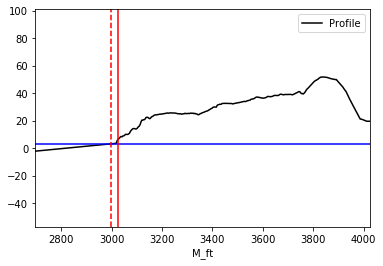

In [3]:
num=27 # picking transect in the middle

tT = tF[tF.TransOrder==num].copy()
tTD = tD[tD.TransOrder== num].copy()

tT.reset_index(drop=True,inplace=True)
tTD.reset_index(drop=True,inplace=True)

tT.insert(loc=5,column='Slope',value=0)

MSL = tTD.iloc[0]['M_MSL']
MHHW = tTD.iloc[0]['M_MHHW']

fig1 = plt.figure()
tT.plot(x='M_ft',y='Z_ft', color='k',label='Profile')
plt.xlim(MSL-300, MHHW + 1000)
plt.axhline(y=2.99, color='b',label='MSL')
plt.axvline(x= MSL, color='r', linestyle='dashed', label='MSL')
plt.axvline(x= MHHW, color='r', label='MHHW')
plt.show()


In [4]:
tT.head()

,TransOrder,POINT_X,POINT_Y,M_ft,Z_ft,Slope,Beach,Fema_VE_ft
0,27,6002780.518,1910109.353,0.000000,-50.000,0,NaN,NaN
1,27,6005795.322,1910255.976,3018.366434,3.541,0,BeanHol,21.0
2,27,6005798.599,1910256.136,3021.647519,5.350,0,BeanHol,21.0
3,27,6005801.876,1910256.295,3024.928292,6.286,0,BeanHol,21.0
4,27,6005805.153,1910256.454,3028.209065,6.829,0,BeanHol,21.0


In [5]:
tTD.head()

,TransOrder,M_MSL,M_MHHW,Distance_ft
0,27,2997.285156,3025.626709,28.341553


## Slope Calculation 

Develop something to find when slope changes significantly and defines the toe of the berm or dune.

77 3267.709834 0.0027725980624342434 0.00685705112321002
80 3277.552482 0.004601341851763448 0.017981808263547023
219 3733.588311 0.0018595624599766242 0.008380661181111674
220 3736.8690840000004 0.008380661181111674 0.029564674412552804


(100, 400)

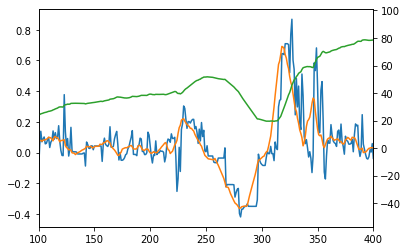

In [6]:
#rolling Slope calculation

sl = []
for i in range(0,len(tT.index)):
    sl.append((tT.iloc[i]['Z_ft']-tT.iloc[i-1]['Z_ft'])/(tT.iloc[i]['M_ft']-tT.iloc[i-1]['M_ft']))
    tT.loc[i,'Slope'] = sl[i]

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

sl_a=moving_average(sl, 10)

for i in range(len(sl_a)-1):
    if sl_a[i] > 0 and sl[i+1] > 0.01 and sl_a[i+1] > 2*sl_a[i]:
        print(i,tT.loc[i,'M_ft'],sl_a[i],sl_a[i+1] )

plt.plot(sl)
plt.plot(sl_a)
tT['Z_ft'].plot(secondary_y=True)

#tT['Sl_a'].plot()
#tT['Z_ft'].plot(secondary_y=True)
plt.xlim(100, 400)
#plt.show()

## Code for Interactive Plotly 

import plotly
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=tT['M_ft'],y=tT['Z_ft'], mode='lines',
    name="Profile"
))

fig.add_trace(go.Scatter(
    x=[MSL,MSL],y=[-40,40], mode='lines',
    name="MSL"
))
fig.add_trace(go.Scatter(
    x=[MHHW,MHHW],y=[-40,40], mode='lines',
    name="MHHW"
))



## Equilibrium profiles derived from field observations 

From analysis of a large number of beach profiles of the Californian and Danish coasts [33][34] and the US Atlantic and Gulf coasts [35] Bruun (1954) and Dean (1977) derived an equilibrium profile (often called the Dean/Bruun profile) of the form (Fig. 3)

http://www.coastalwiki.org/w/images/f/f9/DeanAndBodgeProfiles.jpg

Figure 3. The Bruun/Dean profile (Eq. 3) and the equivalent Bodge profile (Eq. 4).
h(x)=Ax^2/3,(3)

where h is the water depth [m], x the cross-shore distance [m] (x=0 at the shoreline) and A a coefficient depending on the sediment fall velocity w [m/s], A≈0.5w^0.44[m1/3].

Slope is dh/dx = A 2/3 x ^(-1/3)

500 micron sand = 0.05 m/s
A = 0.133


In [7]:

# Offshore Slope caluclation

m_slope = (tT.iloc[1]['Z_ft']-tT.iloc[0]['Z_ft'])/(tT.iloc[1]['M_ft']-tT.iloc[0]['M_ft']) # Bruun offshore slope

#Beach face slope

MHHW = tTD.iloc[0]['M_MHHW'] #Distance to MHHW
MHHWE = 5.6 # MHHW elevation

b_slope = (MHHWE-tT.iloc[1]['Z_ft'])/(MHHW-tT.iloc[1]['M_ft'])

# Bruun equilibrium slope for 500 micron sand at 1 m off beach (max slope)
A = 0.5*0.05**0.44 # m^1/3
x = 10 # m
br_slope = A*2./3.*(x)**(-1./3.)

# EjMLWP - First elevation on transect at most liekly winter profile

EjMLWP = tT.iloc[1]['Z_ft']

#  Determine TWL and Ejstorm

TWL = tT.iloc[1]['Fema_VE_ft']

Ejstorm = TWL

#  Select maximum slope
list = [m_slope, b_slope, br_slope] 
slope = max(list)

#Determine Ris - Gemoetric extension of slope to Ejstorm elevation 

Ris = (Ejstorm-EjMLWP)/slope
MRis= Ris + tT.iloc[1]['M_ft']
# Assume storm duration is the same as the profile time scale (Ts/Td = 1)

alpha = 0.35  #from FEMA figure 2.1.1-8

Rm = alpha * Ris 
MRm = Rm + tT.iloc[1]['M_ft']

print('Bruun Eq. Slope: ',br_slope)
print('Offshore Slope: ',m_slope)
print('Beach Face Slope: ',b_slope)
print('Maximum Slope: ', slope)
print('Maximim Erosion (ft):',Ris)
print('Characteristic Storm Erosion (ft):',Rm)

Bruun Eq. Slope:  0.041408758880623994
Offshore Slope:  0.017738402894325322
Beach Face Slope:  0.28359808836441786
Maximum Slope:  0.28359808836441786
Maximim Erosion (ft): 61.56247459808522
Characteristic Storm Erosion (ft): 21.546866109329823


Find first elevation on transects that intersect with the TWL

<Figure size 432x288 with 0 Axes>

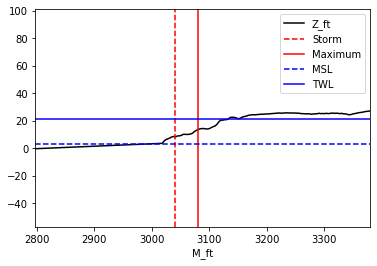

In [8]:
plt.figure()
tT.plot(x='M_ft',y='Z_ft', color='k')
plt.xlim(MSL-200, MRis + 300)
plt.axvline(x=MRm, color='r',linestyle='dashed', label = 'Storm')
plt.axvline(x=MRis, color='r', label = 'Maximum')
plt.axhline(y=2.99, color='b',linestyle='dashed', label='MSL')
plt.axhline(y=TWL, color='b', label = 'TWL')
plt.legend()
plt.show()

In [42]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

@interact
def show_trans(Transect=(0,100,1)):

    tT = tF[tF.TransOrder==Transect].copy()
    tTD = tD[tD.TransOrder==Transect].copy()

    MSL = tTD.iloc[0]['M_MSL']
    MHHW = tTD.iloc[0]['M_MHHW']

#Bruun offshore slope for SLR
    
    m_slope = (tT.iloc[1]['Z_ft']-tT.iloc[0]['Z_ft'])/(tT.iloc[1]['M_ft']-tT.iloc[0]['M_ft']) 

#Beach face slope

    MHHW = tTD.iloc[0]['M_MHHW'] #Distance to MHHW
    MHHWE = 5.6 # MHHW elevation

    b_slope = (MHHWE-tT.iloc[1]['Z_ft'])/(MHHW-tT.iloc[1]['M_ft'])
    
# Bruun equilibrium slope for 500 micron sand at 1 m off beach (max slope)
    
    A = 0.5*0.05**0.44 # m^1/3
    x = 10 # m
    br_slope = A*2./3.*(x)**(-1./3.)

# EjMLWP - First elevation on transect at most liekly winter profile

    EjMLWP = tT.iloc[1]['Z_ft']

#  Determine TWL and Ejstorm

    TWL = tT.iloc[1]['Fema_VE_ft']

    Ejstorm = TWL

#  Select maximum slope
    list = [b_slope, br_slope] 
    eslope = max(list)


    
#Determine Ris - Gemoetric extension of slope to Ejstorm elevation MAX EROSION
# include SLR of 0 25 50 150

    Ris = (Ejstorm-EjMLWP)/eslope
    
    Ris_25 = (Ejstorm-EjMLWP)/eslope + 0.25*3.28 / m_slope
    Ris_50 = (Ejstorm-EjMLWP)/eslope + 0.50*3.28 / m_slope
    Ris_150 = (Ejstorm-EjMLWP)/eslope + 1.50*3.28 / m_slope

# Assume storm duration is the same as the profile time scale (Ts/Td = 1)

    alpha = 0.35  #from FEMA figure 2.1.1-8

    Rm = alpha * Ris 
    MRm = Rm + tT.iloc[1]['M_ft']
    
    MRis= Ris + MHHW
    MRis2= Ris_25 + MHHW
    MRis3= Ris_50 + MHHW
    MRis4= Ris_150 + MHHW

    fig1 = plt.figure()
    tT.plot(x='M_ft',y='Z_ft', color='k')
    plt.xlim(MSL-200, MRis + 750)
    plt.ylim(-50, 125)
    plt.axvline(x=MRm, color='r',linestyle=':', label = 'Storm')
    plt.axvline(x=MRis, color='r', label = 'Maximum')
    plt.axhline(y=2.99, color='b',linestyle='dashed', label='MSL')
    plt.axhline(y=TWL, color='b', label = 'TWL')
    
    plt.axvline(x=MRis2, color='r',linestyle='dashed', label='25 cm')
    plt.axvline(x=MRis3, color='r',linestyle='dotted', label='50 cm')
    plt.axvline(x=MRis4, color='r',linestyle='dashdot', label='150 cm')
    
    plt.legend()
    plt.show()

interactive(children=(IntSlider(value=50, description='Transect'), Output()), _dom_classes=('widget-interact',…

## Data Analysis

Add translation due to sea level rise
Get values from San Mateo AB691 report
0 
25
50
150


In [31]:
index =0
num_tran=tF['TransOrder'].max()

Tran_Out = pd.DataFrame([[0, 0, 0, 'Test', 0,0]], columns=['TransOrder','M_MSL','M_MHHW','Beach','Distance_ft','Max_Ero'])

# use transects variable to cycle through

for NUM in transects:
    

    tT = tF[tF.TransOrder==NUM].copy()
    tTD = tD[tD.TransOrder== NUM].copy()

    MSL = tTD.iloc[0]['M_MSL']
    MHHW = tTD.iloc[0]['M_MHHW']
    
#    tTD.insert(loc=4,column='Max_Ero',value=0)
#    tTD.insert(loc=5,column='Max_25',value=0)
#    tTD.insert(loc=6,column='Max_50',value=0)
#    tTD.insert(loc=7,column='Max_150',value=0)
    
#Bruun offshore slope for SLR
    
    m_slope = (tT.iloc[1]['Z_ft']-tT.iloc[0]['Z_ft'])/(tT.iloc[1]['M_ft']-tT.iloc[0]['M_ft']) 


#Beach face slope

    MHHW = tTD.iloc[0]['M_MHHW'] #Distance to MHHW
    MHHWE = 5.6 # MHHW elevation

    b_slope = (MHHWE-tT.iloc[1]['Z_ft'])/(MHHW-tT.iloc[1]['M_ft'])
    
# Bruun equilibrium slope for 500 micron sand at 1 m off beach (max slope)
    
    A = 0.5*0.05**0.44 # m^1/3
    x = 10 # m
    br_slope = A*2./3.*(x)**(-1./3.)

# EjMLWP - First elevation on transect at most liekly winter profile

    EjMLWP = tT.iloc[1]['Z_ft']

#  Determine TWL and Ejstorm

    TWL = tT.iloc[1]['Fema_VE_ft']

    Ejstorm = TWL

#  Select maximum slope
    list = [b_slope, br_slope] 
    eslope = max(list)

#Determine Ris - Gemoetric extension of slope to Ejstorm elevation MAX EROSION
# include SLR of 0 25 50 150

    Ris = (Ejstorm-EjMLWP)/eslope
    
    Ris_25 = (Ejstorm-EjMLWP)/eslope + 0.25*3.28 / m_slope
    Ris_50 = (Ejstorm-EjMLWP)/eslope + 0.50*3.28 / m_slope
    Ris_150 = (Ejstorm-EjMLWP)/eslope + 1.50*3.28 / m_slope
    
    MRis= Ris + MHHW
    MRis2= Ris_25 + MHHW
    MRis3= Ris_50 + MHHW
    MRis4= Ris_150 + MHHW
    
    tTD['Max_Ero'] = MRis
    tTD['Max_25'] = MRis2
    tTD['Max_50'] = MRis3
    tTD['Max_150'] = MRis4
    
#    print('Transect Number: ', NUM)
#    print('Maximim Erosion (ft):', Ris)
#    print('SLR25 Maximim Erosion (ft):', Ris_25)
#    print('SLR50 Maximim Erosion (ft):', Ris_50)
#    print('SLR150 Maximim Erosion (ft):', Ris_150)
#    print('Location (ft): ', MRis)
#    print('Characteristic Storm Erosion (ft):',Rm)    

    Tran_Out=Tran_Out.append(tTD, ignore_index=True)
    Beach=tT.iloc[0]['Beach']
    Tran_Out.loc[index,'Beach'] = Beach
    index=index+1



In [32]:
Tran_Out.head()

,TransOrder,M_MSL,M_MHHW,Beach,Distance_ft,Max_Ero,Max_25,Max_50,Max_150
0,0,0.000000,0.000000,Tunitas,0.000000,0.000000,NaN,NaN,NaN
1,22,5676.027832,5764.945313,Tunitas,88.917481,6546.301743,6633.161107,6720.020472,7067.457929
2,23,5719.106445,5776.700195,Tunitas,57.593750,6553.009381,6640.131121,6727.252861,7075.739822
3,24,5730.315430,5798.560059,Tunitas,68.244629,6393.410053,6427.899653,6462.389253,6600.347653
4,25,5721.012695,5830.179688,Tunitas,109.166992,6626.388049,6715.066445,6803.744841,7158.458427


In [29]:
Tran_Out.to_csv('Erosion.csv')

In [30]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(Tran_Out)

    TransOrder        M_MSL       M_MHHW      Beach  Distance_ft      Max_Ero  \
0            0     0.000000     0.000000    Tunitas     0.000000     0.000000   
1           22  5676.027832  5764.945313    Tunitas    88.917481  6546.301743   
2           23  5719.106445  5776.700195    Tunitas    57.593750  6553.009381   
3           24  5730.315430  5798.560059    Tunitas    68.244629  6393.410053   
4           25  5721.012695  5830.179688    Tunitas   109.166992  6626.388049   
5           21  5617.707520  5730.711426    Tunitas   113.003906  6525.784763   
6           13  5191.882813  5241.889160    Tunitas    50.006348  6012.088533   
7           14  5277.167969  5311.468262    Tunitas    34.300293  6074.024365   
8           15  5319.692383  5378.457520    Tunitas    58.765137  6151.071839   
9           16  5401.614746  5457.535645    Tunitas    55.920898  6238.433234   
10          17  5478.112793  5530.708984    Tunitas    52.596191  6173.481222   
11          18  5519.481934 

In [14]:
from ipyleaflet import *

#+proj=lcc +lat_1=37.06666666666667 +lat_2=38.43333333333333 +lat_0=36.5 +lon_0=-120.5 +x_0=2000000 +y_0=500000.0000000002 +ellps=GRS80 +datum=NAD83 +to_meter=0.3048006096012192 +no_defs 
#+proj=lcc +lat_1=38.43333333333333 +lat_2=37.06666666666667 +lat_0=36.5 +lon_0=-120.5 +x_0=2000000.0001016 +y_0=500000.0001016001 +ellps=GRS80 +to_meter=0.3048006096012192 +no_defs 

cal = {
    'name': 'NAD83 / CA zone 3 ftUS',
    'custom': True, #This is important, it tells ipyleaflet that this projection is not on the predefined ones.
    'proj4def': '+proj=lcc +lat_1=38.43333333333333 +lat_2=37.06666666666667 +lat_0=36.5 +lon_0=-120.5 +x_0=2000000.0001016 +y_0=500000.0001016001 +ellps=GRS80 +to_meter=0.3048006096012192 +no_defs ',
    'origin': [6561666.667, 1640416.667],
    'bounds': [
    [5802768.5811, 1738307.6666], [7346928.6408, 2452463.3364]
    ],
    'resolutions': [
        8192.0,
        4096.0,
        2048.0,
        1024.0,
        512.0,
        256.0
    ]
}

Map(center=(6561666.667, 1640416.667),crs=cal,zoom=0,basemap=basemaps.OpenTopoMap)

ModuleNotFoundError: No module named 'ipyleaflet'